In [1]:
#import packages for data manuplation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
%matplotlib inline

In [2]:
#import sys,os or better access of path
import sys,os

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#add a path to acces the cleaned telecom data
sys.path.append(os.path.abspath(os.path.join('Data')))

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv('../Data/clean_telecom_data_source.csv')
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),http_dl_(bytes),http_ul_(bytes),activity_duration_dl_(ms),activity_duration_ul_(ms),dur._(ms).1,handset_manufacturer,handset_type,nb_of_sec_with_125000b_<_vol_dl,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_dl_<_31250b,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.959783,17.633655,44.0,44.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,3330.0,37882.0,1.321510e+09,Samsung,Samsung Galaxy A8 (2018),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,0.0,0.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   dur._(ms)                                 146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn/number                             146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

<AxesSubplot:xlabel='avg_rtt_dl_(ms)'>

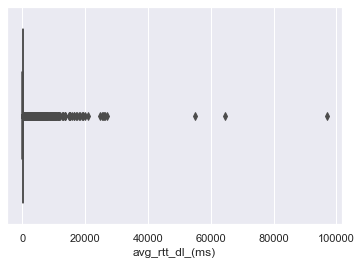

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['avg_rtt_dl_(ms)'], orient='vert')

In [37]:
df['Total_TCP_DL_and_UL'] = df['tcp_dl_retrans._vol_(bytes)'] + df['tcp_ul_retrans._vol_(bytes)']
df['Total_RTT_DL_and_UL'] = df['avg_rtt_dl_(ms)'] + df['avg_rtt_ul_(ms)']
df['Total_Bearer_TP_DL_and_UL'] = df['avg_bearer_tp_ul_(kbps)'] + df['avg_bearer_tp_ul_(kbps)']

In [38]:
experience_df = ['msisdn/number','Total_TCP_DL_and_UL','Total_RTT_DL_and_UL','Total_Bearer_TP_DL_and_UL']

In [39]:
df[experience_df].sort_values(by = 'Total_TCP_DL_and_UL', ascending=False)[:10]

,msisdn/number,Total_TCP_DL_and_UL,Total_RTT_DL_and_UL,Total_Bearer_TP_DL_and_UL
33459,3.366045e+10,4.344116e+09,110.0,32888.0
137797,3.369858e+10,4.301477e+09,486.0,10620.0
76236,3.376211e+10,4.294432e+09,116.0,6064.0
132752,3.365872e+10,4.291465e+09,133.0,16588.0
3675,3.365871e+10,4.288121e+09,81.0,26376.0
116963,3.366469e+10,4.275492e+09,492.0,15492.0
38363,3.366491e+10,4.268647e+09,453.0,4616.0
57531,3.376233e+10,4.261616e+09,113.0,5140.0
75278,3.365828e+10,4.260174e+09,119.0,5852.0
39910,3.365863e+10,4.254660e+09,88.0,59234.0


##### Average TCP retransmission

In [40]:
ave_tcp = df.groupby('msisdn/number')['Total_TCP_DL_and_UL'].mean().reset_index(name='Average TCP Retransmission').\
            sort_values(by='Average TCP Retransmission', ascending=False)
ave_tcp.head(10)

,msisdn/number,Average TCP Retransmission
84895,3.369858e+10,4.301477e+09
31927,3.365871e+10,4.288121e+09
57448,3.366491e+10,4.268647e+09
31599,3.365863e+10,4.254660e+09
61438,3.366613e+10,4.211258e+09
69365,3.366877e+10,4.166595e+09
43189,3.366131e+10,4.137938e+09
47854,3.366240e+10,4.117805e+09
63478,3.366682e+10,3.968121e+09
97180,3.376264e+10,3.786871e+09


##### Average RTT

In [42]:
ave_rtt = df.groupby('msisdn/number')['Total_RTT_DL_and_UL'].mean().reset_index(name='Average RT Time').\
            sort_values(by='Average RT Time', ascending=False)
ave_rtt.head(10)


,msisdn/number,Average RT Time
47501,3.366232e+10,96924.0
79412,3.368369e+10,54848.0
41522,3.366087e+10,32335.0
92861,3.376094e+10,27278.0
1685,3.360679e+10,26300.0
73473,3.367182e+10,25715.0
103221,3.378187e+10,25388.0
104632,3.378401e+10,24738.0
84793,3.369855e+10,23010.5
15244,3.362963e+10,20980.0


##### Handset type per Customer

In [43]:
handset_type = df.groupby('msisdn/number')['handset_type'].count().reset_index(name='Handset Type').\
            sort_values(by='Handset Type', ascending=False)
handset_type.head(10)

,msisdn/number,Handset Type
13381,3.362632e+10,18
6353,3.361489e+10,17
13037,3.362578e+10,17
36669,3.365973e+10,16
75564,3.367588e+10,15
91949,3.376054e+10,15
64472,3.366716e+10,13
653,3.360313e+10,12
91608,3.376041e+10,12
13845,3.362708e+10,12


##### Average throughput per customer

In [61]:
ave_tp = df.groupby('msisdn/number')['Total_Bearer_TP_DL_and_UL'].mean().reset_index(name='Average Throughput').\
            sort_values(by='Average Throughput', ascending=False)
ave_tp.head(10)

,msisdn/number,Average Throughput
6457,3.361508e+10,117226.0
74678,3.367417e+10,107144.0
31282,3.365855e+10,98224.0
7509,3.361674e+10,97378.0
14440,3.362804e+10,96708.0
102508,3.378004e+10,96554.0
99246,3.376374e+10,94734.0
69206,3.366871e+10,94672.0
43342,3.366135e+10,93576.0
51473,3.366327e+10,93326.0


In [75]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),http_dl_(bytes),http_ul_(bytes),activity_duration_dl_(ms),activity_duration_ul_(ms),dur._(ms).1,handset_manufacturer,handset_type,nb_of_sec_with_125000b_<_vol_dl,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_dl_<_31250b,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data,Total_TCP_DL_and_UL,Total_RTT_DL_and_UL,Total_Bearer_TP_DL_and_UL
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,2.182528e+07,47.000000,88.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,2.182528e+07,70.000000,52.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.959783,17.633655,6.0,9.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,2.182528e+07,123.593439,18.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.959783,17.633655,44.0,44.0,2.105238e+07,772902.274842,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.170286e+08,3.296942e+06,3330.0,37882.0,1.321510e+09,Samsung,Samsung Galaxy A8 (2018),999.761617,344.663898,820.911894,150.52426,976.983998,142.876664,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,2.182528e+07,123.593439,88.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,10

In [77]:
top_10_tcp = ave_tcp[:10]
least_10_tcp = ave_tcp[-10:]
print('Top 10 TCP')

Top 10 TCP


,msisdn/number,Average TCP Retransmission
84895,3.369858e+10,4.301477e+09
31927,3.365871e+10,4.288121e+09
57448,3.366491e+10,4.268647e+09
31599,3.365863e+10,4.254660e+09
61438,3.366613e+10,4.211258e+09
69365,3.366877e+10,4.166595e+09
43189,3.366131e+10,4.137938e+09
47854,3.366240e+10,4.117805e+09
63478,3.366682e+10,3.968121e+09
97180,3.376264e+10,3.786871e+09


In [85]:
top_10_tp = ave_tp[:10]
least_10_tp = ave_tp[-10:]
top_10_tp

,msisdn/number,Average Throughput
6457,3.361508e+10,117226.0
74678,3.367417e+10,107144.0
31282,3.365855e+10,98224.0
7509,3.361674e+10,97378.0
14440,3.362804e+10,96708.0
102508,3.378004e+10,96554.0
99246,3.376374e+10,94734.0
69206,3.366871e+10,94672.0
43342,3.366135e+10,93576.0
51473,3.366327e+10,93326.0


In [88]:
handset_tp = df.groupby('handset_type')['Total_Bearer_TP_DL_and_UL'].mean().reset_index(name='Average TP per Handset').\
                                    sort_values(by='Average TP per Handset', ascending=False)
handset_tp[:10]

,handset_type,Average TP per Handset
1040,Sierra Wireless Mc7710,55779.333333
576,Lg Lg-H818P,47154.000000
1296,Xiaomi Communica. M1803E1A,46986.000000
1359,Zyxel Communicat. Lte7460,44430.000000
751,Oppo Cph1701,38796.000000
313,Huawei B715S-23C,33837.076923
766,Ovvi-Cellphone T. Echo,32036.000000
1360,Zyxel Communicat. Sbg3600,29066.000000
147,Asustek Wireless-Ac1200 Lte Router,26016.400000
267,Htc 2Q5V100,25286.666667
